#  Визуализация и работа с данными 

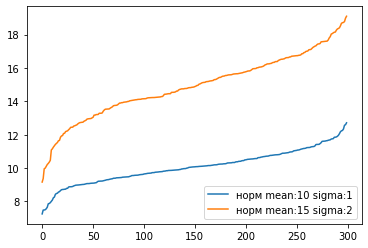

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mean=[(10,1), (15,2)]
sigma=[1,2]
for i in mean:
    plt.plot(sorted(np.random.randn(300)*i[1]+i[0]), label="норм "+'mean:'+str(i[0])+' sigma:'+str(i[1]))
    plt.legend(loc = 'lower right')
plt.show()

Среднее поднимает график, sigma растягивает

Есть N городов, в каждом из них от 5000 до 2000  жителей (смоделируйте эти данные с помощью random.randint()). 

Выберите случайный процент для каждого из городов с помощью np.random.randn() — это будет доля заразившихся (возьмите mean=0.2, sigma=0.05). 

Допустим, что среди заразившихся достаточный уровень антител получают только те, кто болел тяжело, пусть их в среднем 10%. Теперь предположим, что в половине городов случайному количеству людей сделали прививки, в среднем эта доля составила 30%, у всех у них образовалось достаточное количество антител. Отобразите зависимость доли людей с достаточным количеством антител (осьY  от доли привитых+заболевших (осьX ). Не забывайте, что доли не могут быть отрицательными или превышающими единицу.

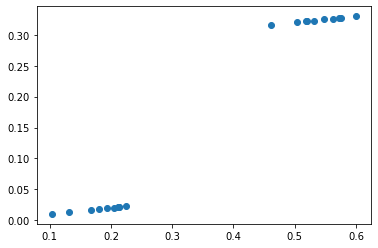

In [45]:
import numpy as np
import matplotlib.pyplot as plt
N = 20
np.random.randint(5000,20000,N)
infected = np.array([np.random.randn()*0.05+0.2 for i in range (N)])
antibodies = .1
vaccinated = np.array([0.3 if i<N/2 else 0 for i in range (N)])
vaccinated_and_sicked = vaccinated+infected*antibodies
plt.scatter(x=vaccinated+infected, y=vaccinated_and_sicked,)

## Скачиваем видео с помощью youtube-dl

Как следует из названия этой библиотеки, она предназначена для скачивания файлов с сайта YouTube. Она позволяет задавать качество видео и звука, скачивать отдельно звуковые дорожки и так далее.

Порядок установки библиотеки зависит от вашей операционной системы. Для ОС Windows воспользуйтесь ссылкой на официальном сайте. Обратите внимание, что сначала вам нужно будет установить Microsoft Visual C++ 2010.

In [48]:
import youtube_dl
#бъект YoutubeDL принимает на вход параметры скачивания
ydl = youtube_dl.YoutubeDL({'format': 'best', 'outtmpl': '%(id)s.%(ext)s'})
ydl.download(['https://www.youtube.com/watch?v=Shbnjqskk6Q'])

[youtube] Shbnjqskk6Q: Downloading webpage
[download] Shbnjqskk6Q.mp4 has already been downloaded
[download] 100% of 33.79MiB


0

В этом примере мы указали 'format': 'best'. Это означает, что видео будет скачано в наилучшем качестве. Также мы указали формат скачанного файла. В нашем случае мы хотим, чтобы файл имел вид <идентификатор видео>.<формат>. 

## Работа с изображениями: skimage

Вообще в Python для этого есть множество библиотек, но сегодня мы расскажем вам об одной из них — библиотеке [skimage](https://scikit-image.org/docs/stable/user_guide.html), являющейся частью пакета scikit. 

Модуль данных skimage содержит не только функции для обработки изображений, но и несколько встроенных примеров наборов данных, которые обычно хранятся в формате jpeg или png.\

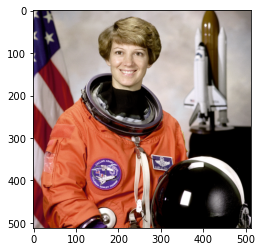

In [49]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

image = data.astronaut()
plt.imshow(image)

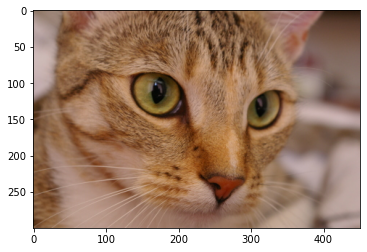

In [52]:
img = skimage.data.chelsea()
plt.imshow(img)
plt.show()         # выводим результат на экран

# Цветные и чёрно-белые изображения

<font color = 'green'>Изображения, загруженные при помощи io.imread() или полученные из библиотеки изображений skimage, представляются в виде массивов numpy.</font>

In [5]:
import skimage
import matplotlib.pyplot as plt

print(skimage.data.chelsea().shape)
print(skimage.data.coins().shape)

(300, 451, 3)
(303, 384)


В первом случае массив трёхмерный, а во втором — двумерный. От чего это зависит? Дело в том, что первое изображение цветное, а второе — чёрно-белое.

В чёрно-белых изображениях мы задаём «интенсивность» пикселей. Чем светлее точка, тем большее значение лежит в соответствующем элементе массива. Интенсивность («цвет») пикселей может принимать значения от 0 (чёрный цвет) до 255 (белый цвет). Например, если в элементе массива img[30, 50] лежит значение110 , то это значит, что 50-й пиксель в 30-й строке имеет серый цвет.

In [6]:
img = skimage.data.coins()
print(img[30, 50])

110


<font color = 'red'>**imshow по умолчанию пытается раскрасить чёрно-белые изображения.**</font>

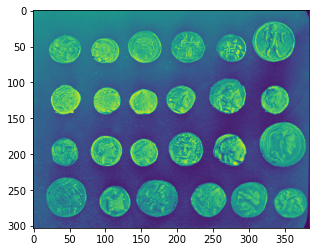

In [7]:
plt.imshow(skimage.data.coins())
plt.show()

Несмотря на то, что картинка чёрно-белая, pyplot попытался угадать цвета. Если нам нужно отключить это поведение и показать картинку в исходном чёрно-белом варианте, нам нужно явно задать «цветовую карту» (параметр cmap):

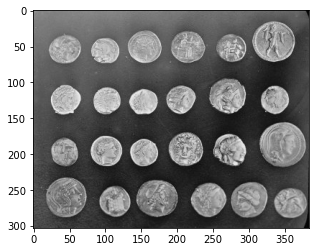

In [8]:
plt.imshow(skimage.data.coins(), cmap='gray') # задаем цветовую карту ч/б
plt.show()

При работе с цветными изображениями нам уже нужен трёхмерный массив. Третье измерение в этом случае содержит интенсивности трёх разных цветовых каналов: R (red), G (green) и B (blue). Все остальные цвета получаются с помощью смешивания этих трёх. Такая схема кодирования цветов называется RGB-кодировка.

Например, картинка с котиком Chelsea имеет размеры 300x451 и три канала цвета: R, G и B.

In [9]:
print(skimage.data.chelsea().shape)

(300, 451, 3)


Интенсивности каналов, опять же, лежат в диапазоне от 0 до 255. Например, тройка (255, 0, 0) — это красный цвет. 

Можете на мгновение отвлечься, представить, что вы Казимир Малевич и нарисовать средствами Python квадрат нужного вам цвета:

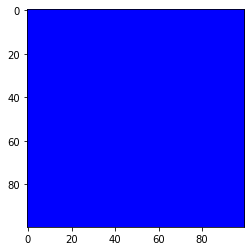

In [10]:
width, height = 100, 100
plt.imshow(np.array([[[0, 0, 255] for _ in range(width)] for __ in range(height)]))
plt.show()

Для преобразования цветного изображения в чёрно-белое можно воспользоваться функцией color.rgb2gray:

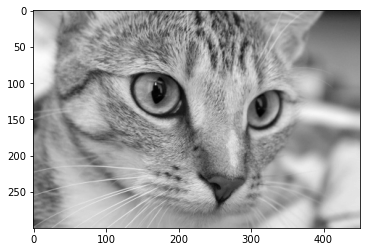

In [11]:
img = skimage.data.chelsea() # загружаем изображение из встроенной библиотеки 
img = skimage.color.rgb2gray(img) # вызываем функцию color.rgb2gray
plt.imshow(img, cmap='gray')
plt.show()

# Быстрые numpy-преобразования

numpy позволяет очень быстро выполнять операции над данными.
Вспомните, как мы фильтровали элементы в numpy: выражение img[:,:,0] > 170 отфильтрует те пиксели изображения, -й канал которых (то есть R — red, красный) имеет интенсивность больше .

Мы можем, например, заменить такие пиксели на синий цвет:

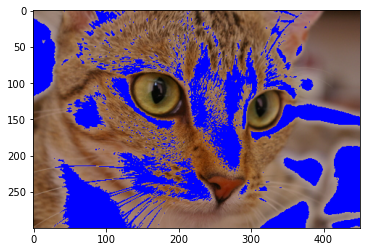

In [12]:
img = skimage.data.chelsea()
img[img[:, :, 0] > 170] = (0, 0, 255)
plt.imshow(img)
plt.show()

Примерно таким же образом работает технология Chroma key: вы фотографируетесь или записываете видео на фоне одноцветного полотна, а потом заменяете все пиксели этого цвета на пиксели другого изображения:

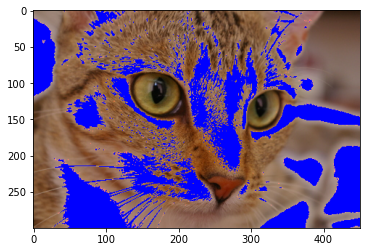

In [15]:
def chroma_key(img, key, background):
    img[img == key] = background
    return img

plt.imshow(chroma_key(img, 170, 255))
plt.show()

Для примера мы можем инвертировать цвета — получить «негатив» изображения. Для этого в каждый из цветовых каналов положим значения, равные 255-x, где x — это то значение, которое там было до изменения:

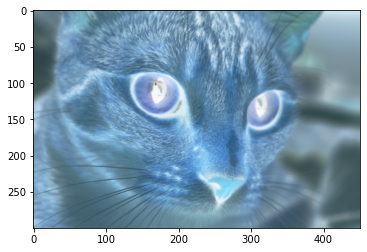

In [16]:
img = skimage.data.chelsea()
img = -img + 255
plt.imshow(img)
plt.show()

# Фильтры

Skimage позволяет применять к изображениям множество фильтров. 

Фильтры — это математические преобразования изображений. Обычно они представляют собой [конволюцию](https://en.wikipedia.org/wiki/Kernel_(image_processing)#Convolution) исходного изображения и ядра фильтра. Это означает, что мы накладываем ядро фильтра (определенную математическую операцию) на каждую матрицу соответствующего размера в изображении. Результаты суммируются и записываются как результат применения фильтра.

Для примера рассмотрим оператор Прюита — фильтр для выделения границ в изображении. Он устроен следующим образом: определяет те пиксели, которые значительно отличаются от соседних и подсвечивает их. Таким образом, становятся видны границы объектов:

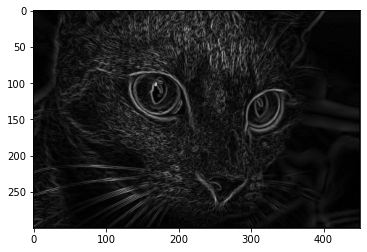

In [20]:
import skimage
from skimage.filters import prewitt

img = skimage.data.chelsea()
img = skimage.color.rgb2gray(img)
flt = skimage.filters.prewitt(img)
plt.imshow(flt, cmap='gray')
plt.show()

# Геометрические преобразования

Мы можем выполнять геометрические преобразования, например взять какой-либо регион изображения, отразить, изменить размеры или повернуть его.

Взять какую-то часть изображения очень просто: нужно лишь взять подмассив (он же массив numpy). Например, следующий код покажет изображение глаза нашего котика Chelsea:

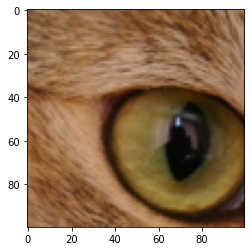

In [21]:
img = skimage.data.chelsea()
img = img[50:150, 100:200]
plt.imshow(img)
plt.show()

Отображение изображений по оси X можно выполнить следующим образом:

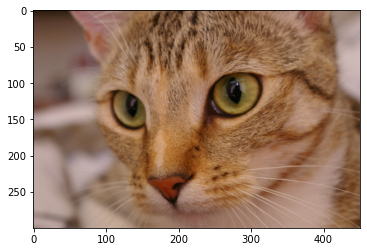

In [22]:
img = skimage.data.chelsea()
img = img[:, ::-1, :]    # первую ось не трогаем, а по второй идём с шагом -1
plt.imshow(img)
plt.show()

Кроме того, можно изменить размеры картинки с помощью skimage.transform.resize:

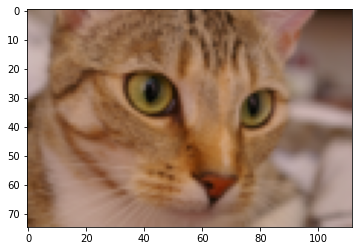

In [23]:
img = skimage.data.chelsea()
# уменьшаем картинку в 4 раза
img = skimage.transform.resize(img, (img.shape[0] // 4, img.shape[1] // 4))
plt.imshow(img)
plt.show()

# Обрабатываем звук через soundfile

Для того, чтобы обрабатывать звук, нужно понимать, как он устроен.

Звук — это колебания воздуха. То, каким мы его слышим, зависит от частот этих колебаний и параметров среды, в которой он распространяется. Объекты, издающие звуки, обладают некоторыми характеристиками, которые влияют на «высоту» звука.

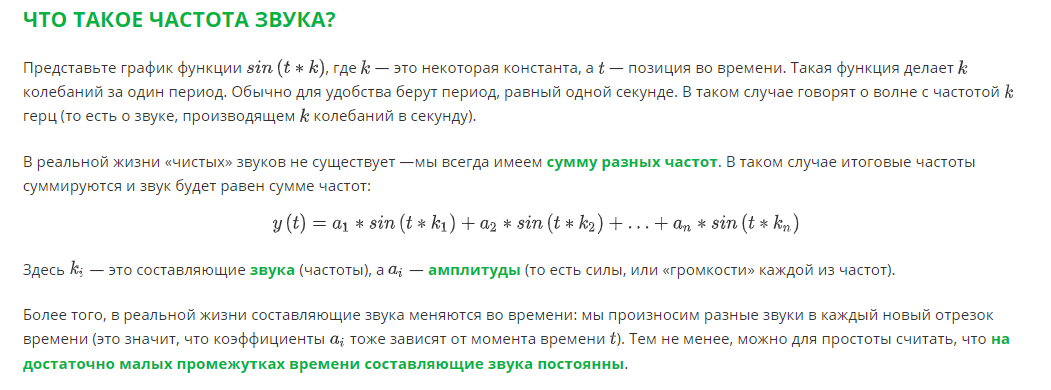

# Представление звука в компьютере, математические основы, обработка спектра

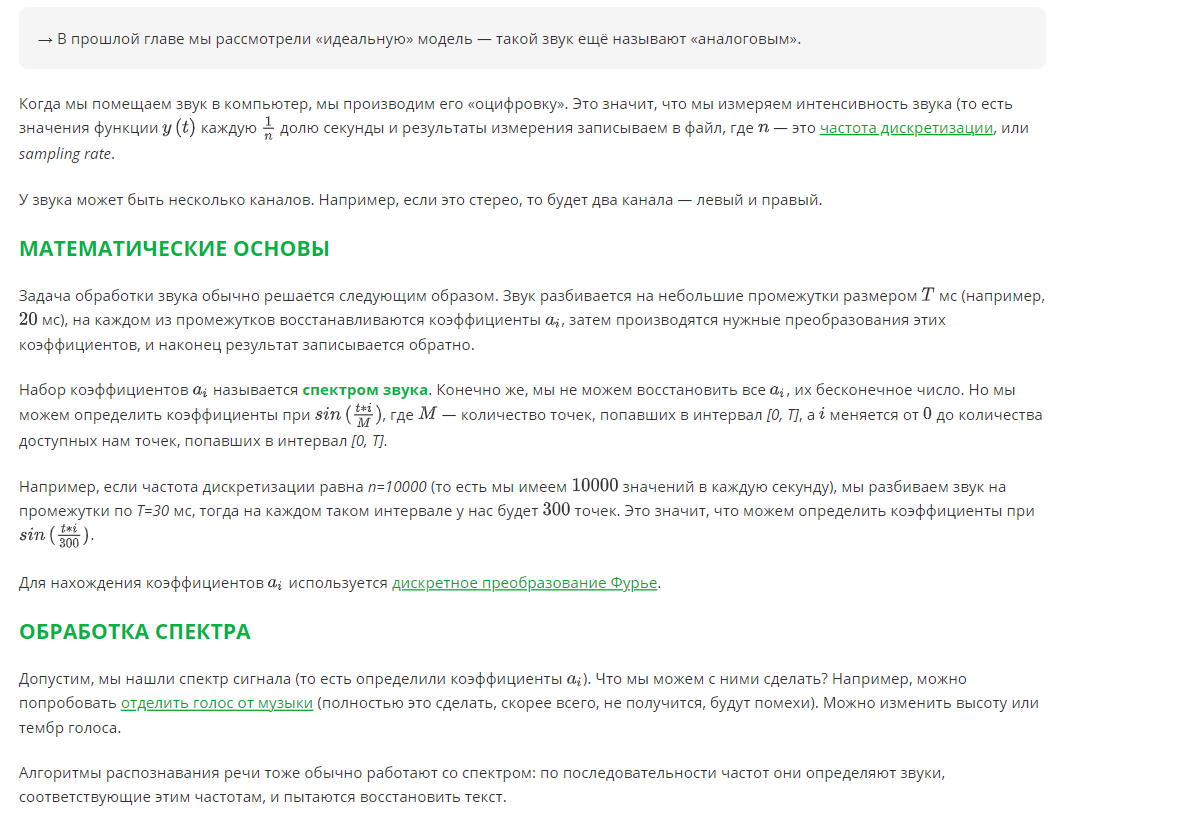В прошлой главе мы рассмотрели «идеальную» модель — такой звук ещё называют «аналоговым».



# Чтение и запись звуковых дорожек

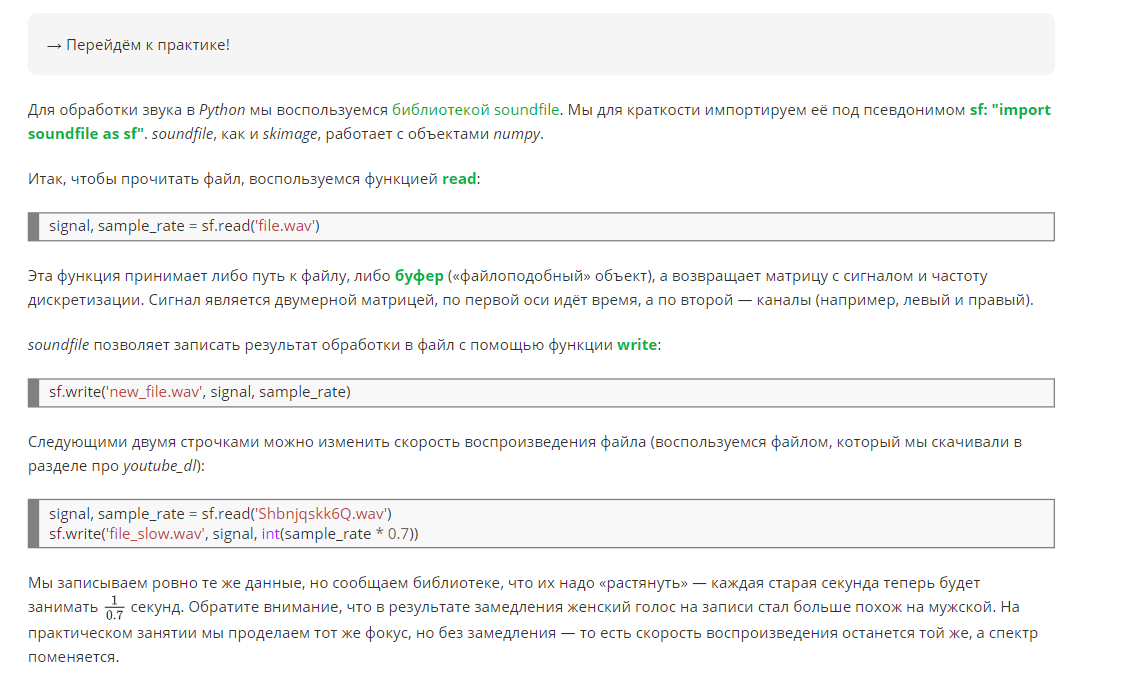

# Визуализация звука
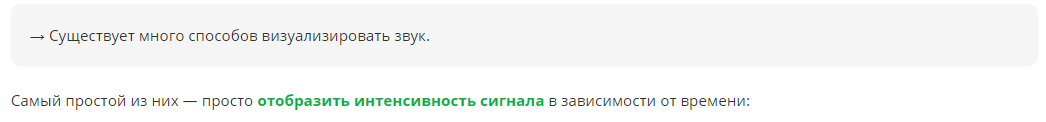

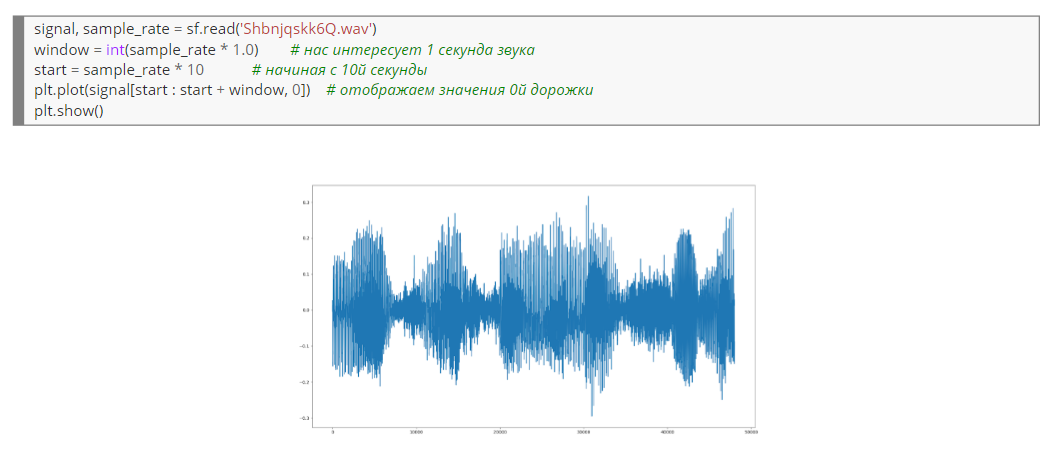

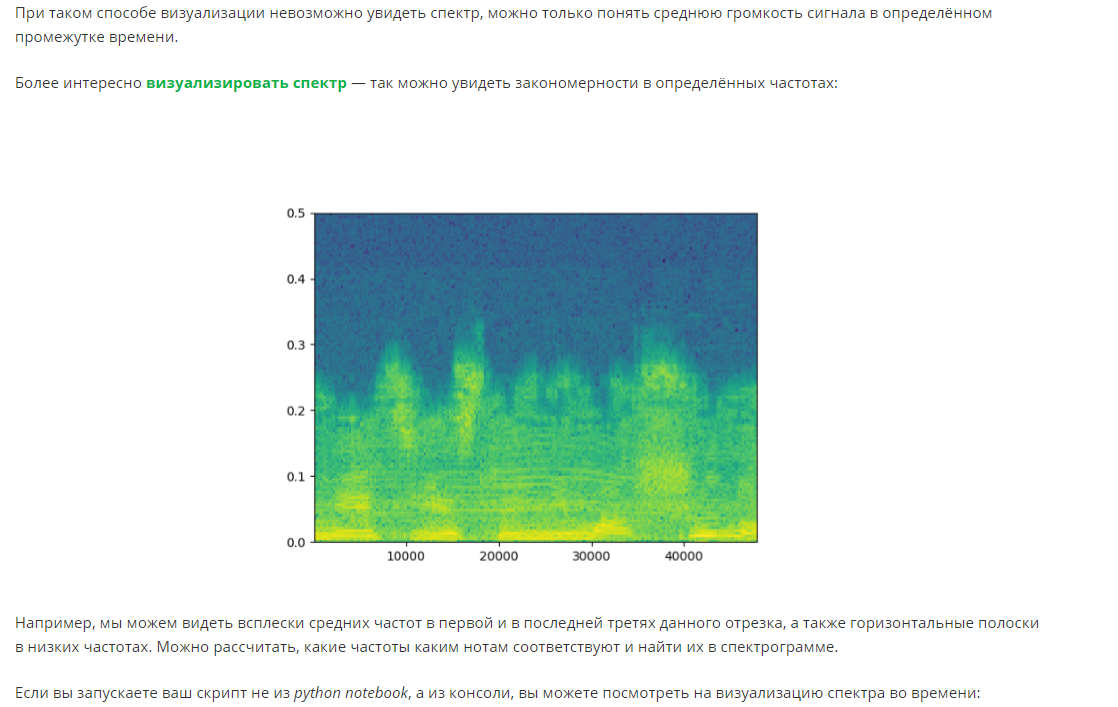

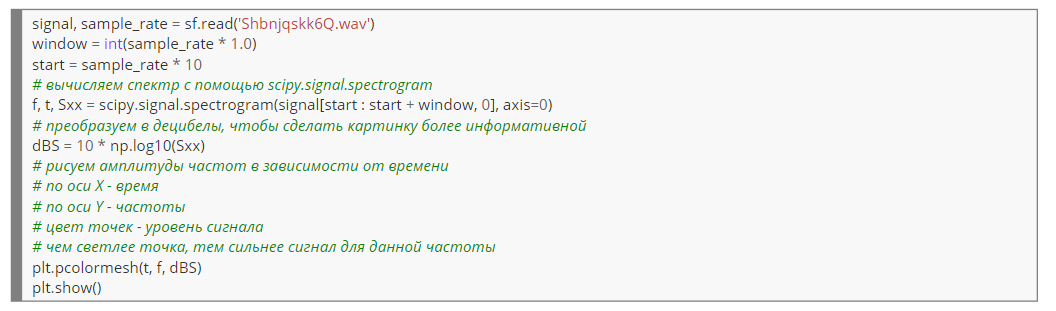